<a href="https://colab.research.google.com/github/jeromeee2330/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_PJMCarreon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROJECT TITLE: Prediction of Product Sales
- Paul Jerome Carreon

##Product Overview

##Load and Inspect Data



In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import required packages
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

# Save the filepath and load the data as
df_product_sales = pd.read_csv(fpath)


In [ ]:
df = df_product_sales.copy()

In [ ]:
df_product_sales.shape

1) How many rows and columns? 8523 rows, 12 columns

In [ ]:
df_product_sales.info();
df_product_sales.head()


2) What are the datatypes of each variable?

In [ ]:
df_product_sales.info()



##Clean Data



3) Are there duplicates? If so, drop any duplicates.

In [ ]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df_product_sales.duplicated(keep= False)

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

no duplicated rows

4) Identify missing values.

In [ ]:
df_product_sales.nunique()

In [ ]:
df_product_sales.nunique() / len(df_product_sales) *100

In [ ]:
df_product_sales['Item_Identifier'].value_counts()

In [ ]:
import missingno as msno
msno.matrix(df_product_sales);

In [ ]:
# save list of categorical column name. (Hint: select_dtypes)
cat_cols = df_product_sales.select_dtypes('object').columns
cat_cols

In [ ]:
# use the list of cat columns to fill null values with MISSING
df_product_sales[cat_cols] = df_product_sales[cat_cols].fillna("MISSING")

In [ ]:
# Saving list of column names for numeric cols
num_cols = df_product_sales.select_dtypes('number').columns
num_cols

In [ ]:
# use the list of num columns to fill null values with -1
df_product_sales[num_cols] = df_product_sales[num_cols].fillna(-1)

In [ ]:
# Confirm no more nulls using Pandas
df_product_sales.isna().sum()

6) Confirm that there are no missing values after addressing them.

In [ ]:
# Confirm no more nulls using using missingno
msno.matrix(df_product_sales);

In [ ]:
# Check the nunique for just the object cols
df_product_sales[cat_cols].nunique()

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
# Remake the list of string columns (after dropping previous cols)
string_cols = df_product_sales.select_dtypes('object').columns
# loop through the list of string columns
  # print the value counts for the column
  # Print an empty line for readability

# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df_product_sales[col].value_counts())
  print('\n')

In [ ]:
# Replace "LF" with "Low Fat"
df_product_sales['Item_Fat_Content'] = df_product_sales['Item_Fat_Content'].replace({'LF':"Low Fat", 'low fat':"Low Fat", 'reg':"Regular"})


# Check the value counts again to confirm
df_product_sales['Item_Fat_Content'].value_counts()

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
df_product_sales[num_cols].describe()


##Exploratory Data Analysis


Heatmap to view the correlation between features

In [ ]:
corr = df_product_sales.corr(numeric_only = True)
corr.round(2)
ax = sns.heatmap(corr, cmap = 'coolwarm', annot = True);
ax.set_title("Correlation of Variables");

We can see that there is a strong correlation between the maximum retail price with item outlet sales.

In [ ]:
ax = sns.countplot(data=df_product_sales, x='Item_Type', order=df_product_sales['Item_Type'].value_counts().index);
ax.tick_params(axis='x', rotation = 90);

As the data suggest, most of the items that were sold were fruits and vegetables followed closely by snack foods.

In [ ]:
means = df_product_sales.groupby('Item_Type')['Item_MRP'].mean().sort_values(ascending=False)
means

In [ ]:
#barplot to explore charges
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(data=df_product_sales, x='Item_Type', y='Item_MRP', order=means.index);
ax.tick_params(axis='x', rotation = 90);
plt.xlabel("Item Type");
plt.ylabel("Item MRP");
plt.title("Item Type vs Item Maximum Retail Price");

In [ ]:
#Histogram for the amount of sales
df_product_sales['Item_Outlet_Sales'].hist(bins = 'auto', edgecolor='black');
ax.set_title('Distribution of Item Outlet Sales');
ax.set_xlabel('Price ($)');
ax.set_ylabel('Number of Sales');

In [ ]:
means_sales = df_product_sales.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

In [ ]:
#barplot to explore charges
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data=df_product_sales, x='Item_Type', y='Item_Outlet_Sales', order=means_sales.index);
ax.tick_params(axis='x', rotation = 90);
plt.xlabel("Item Type");
plt.ylabel("Item Otlet Sales");
plt.title("Item Type vs Item Outlet Sales");

Compare Price for MRP

In [ ]:
Item_sales = df_product_sales.groupby('Item_Type').mean()[['Item_Outlet_Sales','Item_MRP']];
Item_sales.head();

In [ ]:
ax = sns.boxplot(data=df_product_sales, x="Item_Type", y="Item_Outlet_Sales")
ax.set_title("Boxplot for Net Sales");
ax.tick_params(axis='x', rotation = 90);


##Feature Inspection


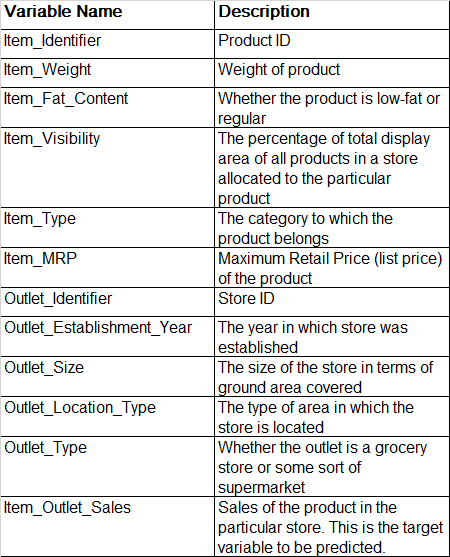

Remove the placeholders you added in week 2 and replace them with null values.

In [ ]:
df_product_sales[cat_cols].loc['MISSING'] = np.nan;
df_product_sales.head()

In [ ]:
df_product_sales[num_cols].loc['-1'] =  np.nan;
df_product_sales.head();

In [ ]:
msno.matrix(df_product_sales);